<a href="https://colab.research.google.com/github/raissaazaria/FoDS_FP/blob/main/FoDS_FP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FoDS Final Project
Chellshe Love Simrochelle - 2502043040

Raissa Azaria - 2502005805

Dataset derived from: https://www.kaggle.com/datasets/farazrahman/earthquake

In [101]:
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [102]:
# Basic library
import pandas as pd # Data analysis
import numpy as np # Array handler
import matplotlib.pyplot as plt #Visualization
import seaborn as sns #Visualization
import re
import missingno as msno
import warnings
import random as rd

# clustering
from sklearn.cluster import KMeans # Clustering machine learning
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# preprocessing
from sklearn.preprocessing import MinMaxScaler # Features scaler
from mpl_toolkits.basemap import Basemap

# upload csv file
from google.colab import files

In [103]:
# reading dataset
!gdown --id 1rjTf2IPpX4S8uYpyQJvhSStIM_RT4WRB

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1rjTf2IPpX4S8uYpyQJvhSStIM_RT4WRB
To: /content/all_month.csv
100% 2.08M/2.08M [00:00<00:00, 70.6MB/s]


In [104]:
# data loading
df = pd.read_csv("all_month.csv")

warnings.filterwarnings("ignore")

x = df.iloc[:, [0, 1, 2, 3]].values

In [105]:
# checking the first 5 rows of the data
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-12-24T02:23:14.097Z,56.963300,-155.453700,25.900000,2.70,ml,NaN,NaN,NaN,0.38,...,2022-12-24T02:25:36.127Z,"78 km W of Akhiok, Alaska",earthquake,NaN,0.700,NaN,NaN,automatic,ak,ak
1,2022-12-24T02:22:21.110Z,19.219999,-155.429993,33.400002,1.94,md,28.0,144.0,NaN,0.14,...,2022-12-24T02:25:35.660Z,"5 km ENE of Pāhala, Hawaii",earthquake,0.72,0.840,1.980,4.0,automatic,hv,hv
2,2022-12-24T01:50:43.200Z,19.248167,-155.395340,31.740000,2.15,ml,41.0,134.0,NaN,0.14,...,2022-12-24T01:56:14.230Z,"10 km ENE of Pāhala, Hawaii",earthquake,0.75,0.740,0.210,6.0,automatic,hv,hv
3,2022-12-24T01:47:09.698Z,-5.123400,153.304600,40.437000,4.70,mb,23.0,128.0,1.466,0.73,...,2022-12-24T02:23:27.040Z,"New Ireland region, Papua New Guinea",earthquake,12.19,7.840,0.129,18.0,reviewed,us,us
4,2022-12-24T01:39:51.776Z,44.090900,148.181500,57.073000,4.60,mb,45.0,169.0,4.025,0.59,...,2022-12-24T01:57:44.040Z,Kuril Islands,earthquake,9.06,5.403,0.068,65.0,reviewed,us,us


In [106]:
# checking the last 5 rows of the data
df.tail()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
10941,2022-11-24T03:00:29.990Z,37.146667,-121.542333,3.71,0.79,md,17.0,50.0,0.069260,0.1400,...,2022-11-24T12:41:15.684Z,"9km NE of San Martin, CA",earthquake,0.29,0.96,0.229000,14.0,reviewed,nc,nc
10942,2022-11-24T02:53:01.020Z,18.308833,-67.168667,14.96,2.49,md,3.0,328.0,0.306000,0.1300,...,2022-11-24T04:00:27.327Z,"2 km NW of Las Marias, Puerto Rico",earthquake,1.44,12.41,0.012837,2.0,reviewed,pr,pr
10943,2022-11-24T02:42:08.540Z,33.758000,-116.917000,10.62,0.67,ml,21.0,129.0,0.070960,0.0900,...,2022-11-28T20:36:10.575Z,"2km WNW of Valle Vista, CA",earthquake,0.23,0.35,0.185000,9.0,reviewed,ci,ci
10944,2022-11-24T02:35:21.590Z,38.799333,-122.751167,1.51,1.38,md,44.0,47.0,0.006801,0.0500,...,2022-11-26T10:46:12.336Z,"2km N of The Geysers, CA",earthquake,0.16,0.27,0.208000,9.0,reviewed,nc,nc
10945,2022-11-24T02:33:35.197Z,39.595700,-119.086100,0.00,1.80,ml,24.0,115.3,0.258000,0.2032,...,2022-11-24T16:04:41.194Z,"14 km E of Fernley, Nevada",earthquake,NaN,0.00,0.270000,12.0,reviewed,nn,nn


In [107]:
# show all column in dataset
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [108]:
# prints information about dataset
df.info()
df[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10946 entries, 0 to 10945
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             10946 non-null  object 
 1   latitude         10946 non-null  float64
 2   longitude        10946 non-null  float64
 3   depth            10946 non-null  float64
 4   mag              10943 non-null  float64
 5   magType          10943 non-null  object 
 6   nst              8032 non-null   float64
 7   gap              8032 non-null   float64
 8   dmin             5912 non-null   float64
 9   rms              10946 non-null  float64
 10  net              10946 non-null  object 
 11  id               10946 non-null  object 
 12  updated          10946 non-null  object 
 13  place            10946 non-null  object 
 14  type             10946 non-null  object 
 15  horizontalError  7157 non-null   float64
 16  depthError       10945 non-null  float64
 17  magError    

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-12-24T02:23:14.097Z,56.963300,-155.453700,25.900000,2.70,ml,NaN,NaN,NaN,0.38,...,2022-12-24T02:25:36.127Z,"78 km W of Akhiok, Alaska",earthquake,NaN,0.700,NaN,NaN,automatic,ak,ak
1,2022-12-24T02:22:21.110Z,19.219999,-155.429993,33.400002,1.94,md,28.0,144.0,NaN,0.14,...,2022-12-24T02:25:35.660Z,"5 km ENE of Pāhala, Hawaii",earthquake,0.72,0.840,1.980,4.0,automatic,hv,hv
2,2022-12-24T01:50:43.200Z,19.248167,-155.395340,31.740000,2.15,ml,41.0,134.0,NaN,0.14,...,2022-12-24T01:56:14.230Z,"10 km ENE of Pāhala, Hawaii",earthquake,0.75,0.740,0.210,6.0,automatic,hv,hv
3,2022-12-24T01:47:09.698Z,-5.123400,153.304600,40.437000,4.70,mb,23.0,128.0,1.46600,0.73,...,2022-12-24T02:23:27.040Z,"New Ireland region, Papua New Guinea",earthquake,12.19,7.840,0.129,18.0,reviewed,us,us
4,2022-12-24T01:39:51.776Z,44.090900,148.181500,57.073000,4.60,mb,45.0,169.0,4.02500,0.59,...,2022-12-24T01:57:44.040Z,Kuril Islands,earthquake,9.06,5.403,0.068,65.0,reviewed,us,us
5,2022-12-24T01:35:21.590Z,19.179832,-155.471161,33.470001,2.26,md,37.0,89.0,NaN,0.11,...,2022-12-24T01:38:28.740Z,"2 km SSE of Pāhala, Hawaii",earthquake,0.66,0.930,0.800,16.0,automatic,hv,hv
6,2022-12-24T01:33:35.390Z,36.982666,-121.634499,4.110000,1.36,md,8.0,94.0,0.05614,0.06,...,2022-12-24T01:59:12.019Z,"6km WSW of Gilroy, CA",earthquake,0.40,1.030,0.160,7.0,automatic,nc,nc
7,2022-12-24T01:33:05.490Z,36.982834,-121.634003,4.830000,1.73,md,11.0,91.0,0.05645,0.05,...,2022-12-24T01:49:11.962Z,"6km WSW of Gilroy, CA",earthquake,0.28,0.750,0.150,15.0,automatic,nc,nc
8,2022-12-24T01:32:52.642Z,58.187900,-155.358200,1.300000,0.80,ml,NaN,NaN,NaN,0.16,...,2022-12-24T01:35:26.317Z,"87 km NW of Karluk, Alaska",earthquake,NaN,1.000,NaN,NaN,automatic,ak,ak
9,2022-12-24T01:19:05.660Z,19.257166,-155.388000,30.500000,2.17,md,29.0,132.0,NaN,0.12,...,2022-12-24T01:22:16.610Z,"11 km ENE of Pāhala, Hawaii",earthquake,0.68,1.010,0.650,9.0,automatic,hv,hv


In [109]:
# returns a DataFrame object where all the values are replaced with a Boolean value True for NULL values, and otherwise False.
df.isnull()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,False,False,False,False,False,False,True,True,True,False,...,False,False,False,True,False,True,True,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10941,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10942,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10943,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10944,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


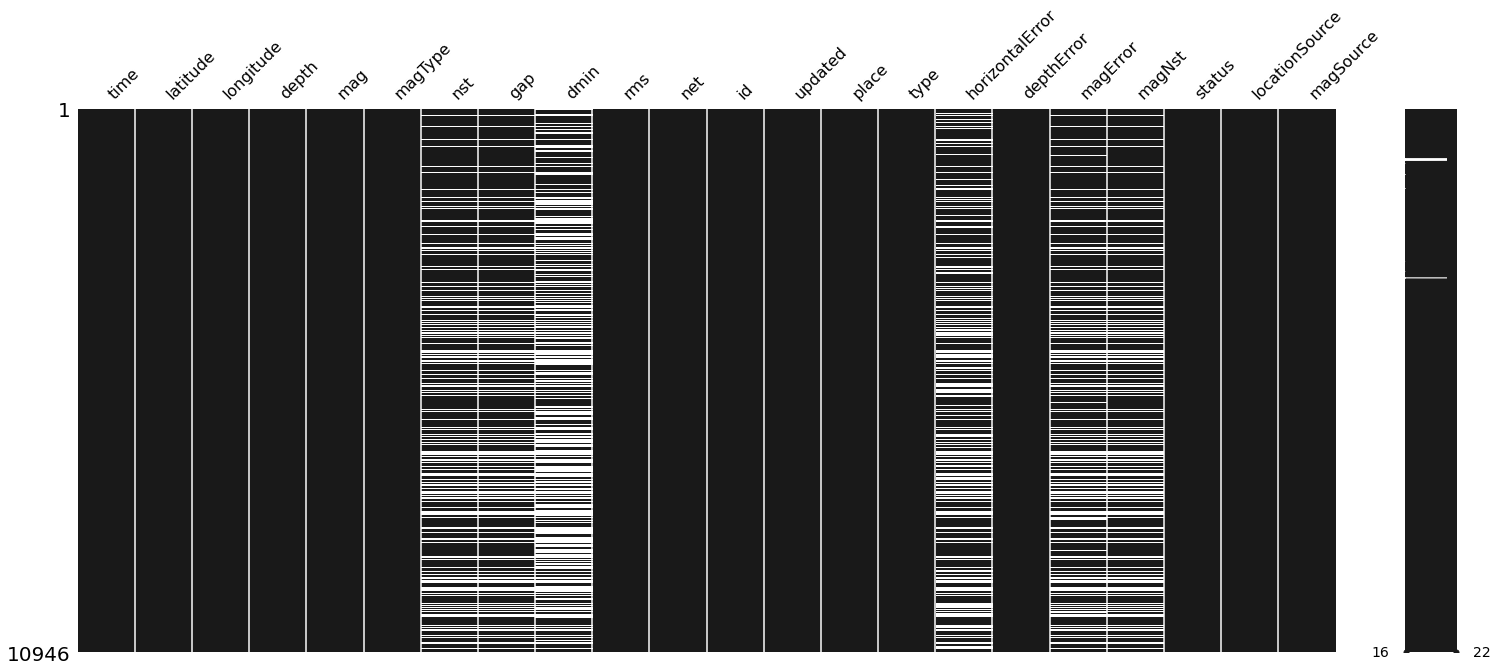

In [110]:
# showing missing value in each 
msno.matrix(df, color="0.1")
plt.show()

In [111]:
# returns the number of missing values in the dataset.
df.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   3
magType               3
nst                2914
gap                2914
dmin               5034
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    3789
depthError            1
magError           3053
magNst             2927
status                0
locationSource        0
magSource             0
dtype: int64

In [112]:
# removes the rows that contains NULL values.
df.dropna()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
3,2022-12-24T01:47:09.698Z,-5.123400,153.304600,40.437,4.70,mb,23.0,128.0,1.466000,0.73,...,2022-12-24T02:23:27.040Z,"New Ireland region, Papua New Guinea",earthquake,12.19,7.840,0.129000,18.0,reviewed,us,us
4,2022-12-24T01:39:51.776Z,44.090900,148.181500,57.073,4.60,mb,45.0,169.0,4.025000,0.59,...,2022-12-24T01:57:44.040Z,Kuril Islands,earthquake,9.06,5.403,0.068000,65.0,reviewed,us,us
6,2022-12-24T01:33:35.390Z,36.982666,-121.634499,4.110,1.36,md,8.0,94.0,0.056140,0.06,...,2022-12-24T01:59:12.019Z,"6km WSW of Gilroy, CA",earthquake,0.40,1.030,0.160000,7.0,automatic,nc,nc
7,2022-12-24T01:33:05.490Z,36.982834,-121.634003,4.830,1.73,md,11.0,91.0,0.056450,0.05,...,2022-12-24T01:49:11.962Z,"6km WSW of Gilroy, CA",earthquake,0.28,0.750,0.150000,15.0,automatic,nc,nc
10,2022-12-24T01:19:04.760Z,34.020833,-116.729000,15.180,1.01,ml,29.0,53.0,0.066970,0.19,...,2022-12-24T01:22:44.044Z,"13km NNE of Cabazon, CA",earthquake,0.33,0.620,0.119000,25.0,automatic,ci,ci
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10939,2022-11-24T03:13:52.370Z,37.331500,-121.695500,8.230,0.93,md,22.0,55.0,0.043380,0.06,...,2022-11-24T12:51:14.743Z,"12km ESE of Alum Rock, CA",earthquake,0.19,0.380,0.157000,20.0,reviewed,nc,nc
10941,2022-11-24T03:00:29.990Z,37.146667,-121.542333,3.710,0.79,md,17.0,50.0,0.069260,0.14,...,2022-11-24T12:41:15.684Z,"9km NE of San Martin, CA",earthquake,0.29,0.960,0.229000,14.0,reviewed,nc,nc
10942,2022-11-24T02:53:01.020Z,18.308833,-67.168667,14.960,2.49,md,3.0,328.0,0.306000,0.13,...,2022-11-24T04:00:27.327Z,"2 km NW of Las Marias, Puerto Rico",earthquake,1.44,12.410,0.012837,2.0,reviewed,pr,pr
10943,2022-11-24T02:42:08.540Z,33.758000,-116.917000,10.620,0.67,ml,21.0,129.0,0.070960,0.09,...,2022-11-28T20:36:10.575Z,"2km WNW of Valle Vista, CA",earthquake,0.23,0.350,0.185000,9.0,reviewed,ci,ci


In [113]:
# fills the NULL values with a 0 
df.fillna(0,inplace=True)

In [114]:
# replacing the letters T and Z to a space
df = df.replace('Z', '', regex=True)
df = df.replace('T', ' ', regex=True)
print(df)

                          time   latitude   longitude      depth   mag  \
0      2022-12-24 02:23:14.097  56.963300 -155.453700  25.900000  2.70   
1      2022-12-24 02:22:21.110  19.219999 -155.429993  33.400002  1.94   
2      2022-12-24 01:50:43.200  19.248167 -155.395340  31.740000  2.15   
3      2022-12-24 01:47:09.698  -5.123400  153.304600  40.437000  4.70   
4      2022-12-24 01:39:51.776  44.090900  148.181500  57.073000  4.60   
...                        ...        ...         ...        ...   ...   
10941  2022-11-24 03:00:29.990  37.146667 -121.542333   3.710000  0.79   
10942  2022-11-24 02:53:01.020  18.308833  -67.168667  14.960000  2.49   
10943  2022-11-24 02:42:08.540  33.758000 -116.917000  10.620000  0.67   
10944  2022-11-24 02:35:21.590  38.799333 -122.751167   1.510000  1.38   
10945  2022-11-24 02:33:35.197  39.595700 -119.086100   0.000000  1.80   

      magType   nst    gap      dmin     rms  ...                  updated  \
0          ml   0.0    0.0  0.000

In [115]:
# prints the data that has a duplicate 
print(df.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
10941    False
10942    False
10943    False
10944    False
10945    False
Length: 10946, dtype: bool


In [116]:
# dropping the duplicates
df.drop_duplicates(inplace = True)

In [117]:
# describe the data
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,10946.000000,10946.000000,10946.00000,10946.000000,10946.000000,10946.000000,10946.000000,10946.000000,10946.000000,10946.000000,10946.000000,10946.000000
mean,40.251389,-119.206851,24.01988,1.651484,16.599488,89.517521,0.364471,0.282491,1.113645,2.096111,0.204121,10.660515
std,20.067601,64.164776,51.04860,1.193518,21.303481,77.229754,1.730739,0.255797,2.651342,15.964088,0.437827,20.326689
min,-65.380700,-179.940400,-3.74000,-1.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.225542,-153.305600,2.98250,0.900000,0.000000,0.000000,0.000000,0.100000,0.000000,0.410000,0.000000,0.000000
50%,38.830002,-122.858833,8.86500,1.450000,10.000000,81.000000,0.007345,0.180000,0.270000,0.700000,0.122864,6.000000
75%,58.252167,-116.774833,21.87350,2.100000,24.000000,136.307500,0.069998,0.440000,0.600000,1.480000,0.210000,13.000000
max,78.699100,179.961700,654.23700,6.700000,492.000000,353.210000,39.621000,3.810000,48.990000,1604.000000,5.220000,540.000000


In [118]:
# standarized data
df_outcome = pd.crosstab(index=df["mag"],  
                              columns="count")      

df_outcome

col_0,count
mag,
-1.33,1
-1.23,1
-1.22,1
-1.10,1
-1.08,1
...,...
5.90,3
6.00,1
6.30,2


In [119]:
# standarized data
df_outcome = pd.crosstab(index=df["depth"], 
                              columns="count")

df_outcome

col_0,count
depth,
-3.740,1
-3.740,1
-3.730,1
-3.720,1
-3.620,1
...,...
603.180,1
603.358,1
605.651,1


In [120]:
# standarized data
tempDf = df[['depth','mag']].copy()
ms = MinMaxScaler()
tempDf = ms.fit_transform(tempDf)
tempDf = pd.DataFrame(tempDf, columns=['depth','mag'])
tempDf.head()

,depth,mag
0,0.045047,0.501868
1,0.056446,0.407223
2,0.053923,0.433375
3,0.067141,0.750934
4,0.092424,0.738481


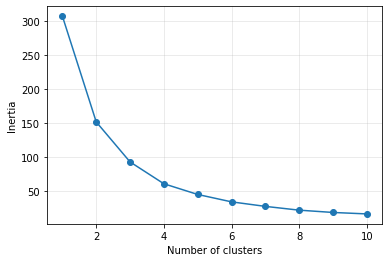

In [121]:
# find optimum cluster amount: elbow method
inertia = []
for i in range(1,11):
    kMeans = KMeans(n_clusters = i)
    kMeans.fit(tempDf[['depth','mag']])  
    inertia.append(kMeans.inertia_)  
plt.plot(range(1,11), inertia, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(alpha = 0.3) 
plt.show()

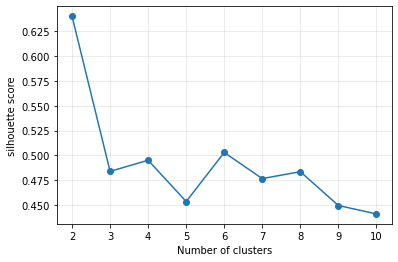

In [122]:
# find optimum cluster amount: sillhouette method
ss = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(tempDf[['depth','mag']])
    cluster_labels = kmeans.labels_
    ss.append(silhouette_score(tempDf[['depth','mag']], cluster_labels)) 
plt.plot(range(2,11), ss, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')
plt.grid(alpha = 0.3)
plt.show()

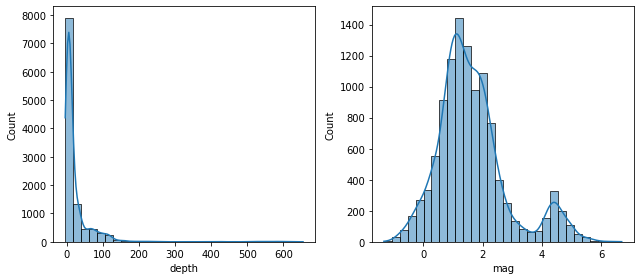

In [123]:
# visualize the data
fig = plt.figure(figsize=(9,4), tight_layout=True)

for i, data in enumerate([df['depth'], df['mag']]):
    bins = 9 if i == 2 else 30
    ax = plt.subplot(1,2, i + 1)
    sns.histplot(data, bins=bins, kde=True)

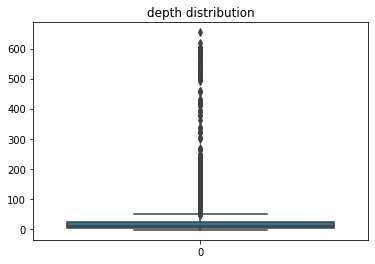

In [124]:
# visualize the data
sns.boxplot(data=df['depth'])
plt.title('depth distribution')
plt.show()

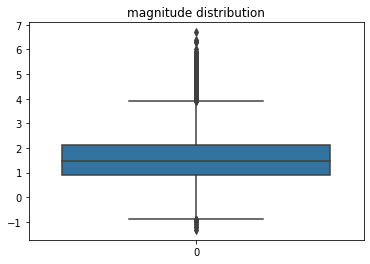

In [125]:
# visualize the data
sns.boxplot(data=df['mag'])
plt.title('magnitude distribution')
plt.show()

In [126]:
# applying kmean clustering
kMeans = KMeans(n_clusters=3)
kMeans.fit(tempDf[['depth','mag']]) 
df['cluster2_3'] = kMeans.labels_
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,cluster2_3
0,2022-12-24 02:23:14.097,56.963300,-155.453700,25.900000,2.70,ml,0.0,0.0,0.000,0.38,...,"78 km W of Akhiok, Alaska",earthquake,0.00,0.700,0.000,0.0,automatic,ak,ak,0
1,2022-12-24 02:22:21.110,19.219999,-155.429993,33.400002,1.94,md,28.0,144.0,0.000,0.14,...,"5 km ENE of Pāhala, Hawaii",earthquake,0.72,0.840,1.980,4.0,automatic,hv,hv,0
2,2022-12-24 01:50:43.200,19.248167,-155.395340,31.740000,2.15,ml,41.0,134.0,0.000,0.14,...,"10 km ENE of Pāhala, Hawaii",earthquake,0.75,0.740,0.210,6.0,automatic,hv,hv,0
3,2022-12-24 01:47:09.698,-5.123400,153.304600,40.437000,4.70,mb,23.0,128.0,1.466,0.73,...,"New Ireland region, Papua New Guinea",earthquake,12.19,7.840,0.129,18.0,reviewed,us,us,1
4,2022-12-24 01:39:51.776,44.090900,148.181500,57.073000,4.60,mb,45.0,169.0,4.025,0.59,...,Kuril Islands,earthquake,9.06,5.403,0.068,65.0,reviewed,us,us,1


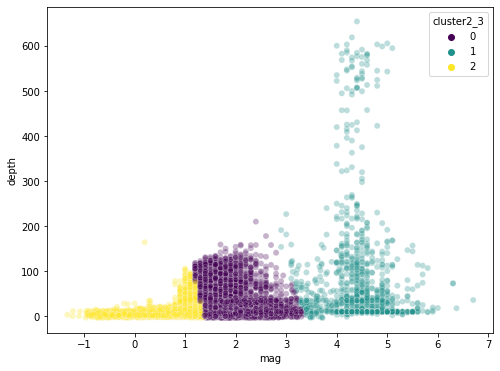

In [127]:
# ploting result
plt.figure(figsize = (8,6))
sns.scatterplot(data = df, y = 'depth', x = 'mag', hue = 'cluster2_3', alpha = 0.3, palette = 'viridis')
plt.show()

In [128]:
# cluster summary
tempList1 = ['depth','mag']
tempList2 = ['earthquakeType','dataAmount','percentage'] + tempList1
eT = 1
tempList3 = []
dflen = len(df)
for i in df['cluster2_3'].unique().tolist():
    tempList4 = []
    tempList4.append(i)
    typelen = len(df.loc[df['cluster2_3']==i])
    tempList4.append(typelen)
    typepercent = round((typelen/dflen)*100,2)
    tempList4.append(typepercent)
    for j in tempList1:
        q25 = str(round(df[j].loc[df['cluster2_3']==i].min(),2))
        q75 = str(round(df[j].loc[df['cluster2_3']==i].max(),2))
        if (q25==q75):
            tempList4.append(q25)
        else:
            tempList4.append("("+q25+") - ("+q75+")")
    tempList3.append(tempList4)
tempdf = pd.DataFrame(tempList3,columns = tempList2)
tempdf

,earthquakeType,dataAmount,percentage,depth,mag
0,0,4998,45.66,(-3.74) - (210.1),(1.2) - (3.34)
1,1,1091,9.97,(-3.74) - (654.24),(2.9) - (6.7)
2,2,4857,44.37,(-3.25) - (164.4),(-1.33) - (1.37)


In [129]:
# result based on percentage
tempdf.sort_values(by='percentage',ascending = False)

,earthquakeType,dataAmount,percentage,depth,mag
0,0,4998,45.66,(-3.74) - (210.1),(1.2) - (3.34)
2,2,4857,44.37,(-3.25) - (164.4),(-1.33) - (1.37)
1,1,1091,9.97,(-3.74) - (654.24),(2.9) - (6.7)


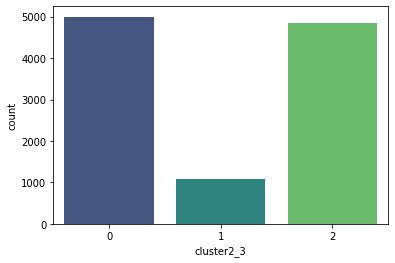

In [130]:
# plot the data
sns.countplot(data = df , x = 'cluster2_3', palette = 'viridis')
plt.show()

In [131]:
# Geographical Visualization
def background_map():
    plt.figure(figsize=(15,9))
    m = Basemap(projection='geos', resolution=None,width=6E6, height=4E6, lat_0=0, lon_0=70)
    m.shadedrelief(scale=0.7)
    return m

Text(0.5, 1.0, 'Earthquake')

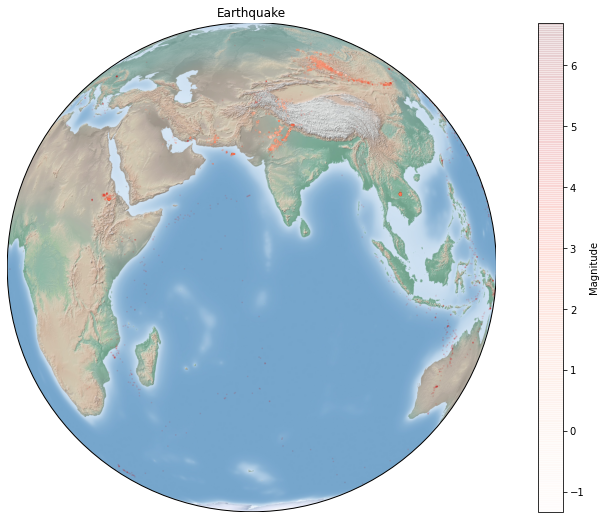

In [132]:
m = background_map()
m.scatter(df['longitude'], df['latitude'], s=0.5 , c=df['mag'], cmap='Reds', latlon=True, alpha=0.1)
plt.colorbar(label='Magnitude')
plt.title('Earthquake')

In [133]:
high_earthquake = df.loc[df['mag'] > 5.5]

In [134]:
mms = MinMaxScaler()

In [135]:
scaled_depth = mms.fit_transform(high_earthquake['depth'].values.reshape(-1,1)).ravel() * 500

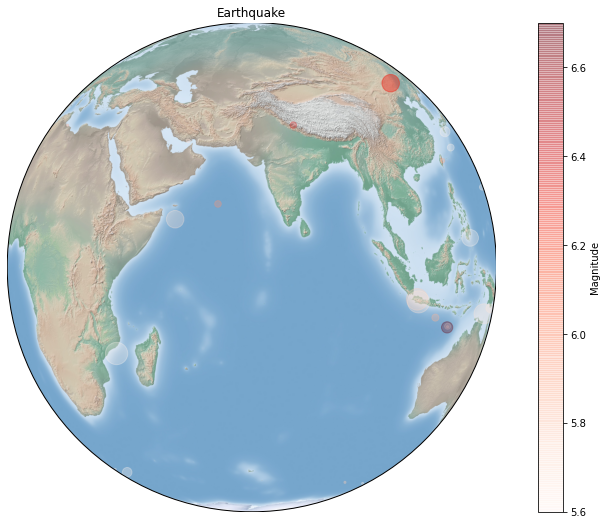

In [136]:
 m = background_map()
m.scatter(high_earthquake['longitude'], high_earthquake['latitude'], s=scaled_depth, c=high_earthquake['mag'], cmap='Reds', latlon=True, alpha=0.3)
plt.colorbar(label='Magnitude')
plt.title('Earthquake')
plt.show()

In [137]:
# Splitting the Data
X = df[['time', 'latitude', 'longitude']]
Y = df[['mag', 'depth']]

In [138]:
from sklearn.linear_model import LinearRegression

X = X.apply(pd.to_numeric, errors='coerce')
Y = Y.apply(pd.to_numeric, errors='coerce')

In [139]:
X.fillna(0, inplace=True)
Y.fillna(0, inplace=True)

In [140]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
clf = LinearRegression().fit(X_train, Y_train)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, X_test.shape)

(8756, 3) (2190, 3) (8756, 2) (2190, 3)


In [141]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, Y_train)
reg.predict(X_test)

array([[ 0.761  , 15.968  ],
       [ 0.58625,  0.7502 ],
       [ 0.4954 ,  7.3565 ],
       ...,
       [ 1.365  , 69.022  ],
       [ 4.78   , 10.0513 ],
       [ 2.3058 , 45.71371]])

In [142]:
# automates the prediction of your data using X_test and compares it with Y_test and by default uses the R-squared metric to so
reg.score(X_test, Y_test)

0.8030913165278764

In [143]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10, 20, 50, 100, 200, 500]}

grid_obj = GridSearchCV(reg, parameters)
grid_fit = grid_obj.fit(X_train, Y_train)
best_fit = grid_fit.best_estimator_
best_fit.predict(X_test)

array([[ 0.7506    , 15.882     ],
       [ 0.63760967,  0.837272  ],
       [ 0.50982   ,  7.28122   ],
       ...,
       [ 1.341     , 69.533     ],
       [ 4.7564    , 11.632276  ],
       [ 2.38566   , 48.58997   ]])

In [144]:
best_fit.score(X_test, Y_test)

0.8050404031185664

In [145]:
import scipy.stats as stats

fvalue, pvalue = stats.f_oneway(df['depth'], df['mag'])
print(fvalue, pvalue)

2100.487654564308 0.0


In [146]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [147]:
import shap

explainer = shap.TreeExplainer(reg)

In [148]:
df.loc[[777]]

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,cluster2_3
777,2022-12-21 04:18:46.820,38.601002,-122.797836,4.51,1.22,md,7.0,150.0,0.1141,0.09,...,"6km NNE of Windsor, CA",earthquake,1.38,2.65,0.05,5.0,automatic,nc,nc,2


In [149]:
choosen_instance = X.loc[[777]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)